<a href="https://colab.research.google.com/github/elienhanj/clustering_mall_cust/blob/main/mall_cluster_elien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Data Mall Customer Segmentation Menggunakan Algoritma K-Means dan Hierarchical**

Elien Hanjani Pramitha - DS0108 - Telkom DTI 2020

## **IMPORT LIBRARY**

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 
# for Elbow Method
from sklearn.cluster import KMeans
# for Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# for Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
# for Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering

## **IMPORT RAW DATASET**

Data yang digunakan adalah data dari https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python .

Data ini merupakan Mall Customer Segmentation Data, dimana format filenya adalah .csv, terdapat 5 kolom yaitu : Customer ID, Gender, Age, Annual Income, Spending Score.

In [ ]:
# Import Dataset
df_cust = pd.read_csv('https://raw.githubusercontent.com/elienhanj/clustering_mall_cust/main/Mall_Customers.csv')
df_cust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Sebelum melakukan pemrosesan data, cek data apakah ada data yang kosong? untuk dataset ini berjumlah 200 data dan tidak ada yang kosong.

In [ ]:
# Prints the Dataset Information
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dari 200 data Customer, dapat dilihat untuk umur customer yang paling muda ada 18 tahun, dan yang paling tua ada customer berumur 70 tahun. Pendapatan terkecil yaitu 15dollar dan terbanyak ada 137dollar. Untuk skor pengeluaran pun ada yang terkecil yaitu 1 dan terbesar yaitu 99. Nantinya data ini akan dikelompokan menjadi beberapa kelompok seperti manakah customer dengan pemasukan banyak tetapi pengeluaran sedikit? atau manakah customer dengan pemasukan sedikit tetapi pengeluaran banyak?

In [ ]:
# Prints Descriptive Statistics
df_cust.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


## **SPLIT COLUMN DATA**

Dari dataset tersebut, untuk pemrosesan clustering sebenarnya hanya membutuhkan kolom Annual Income dan Spending Score. Maka akan dilakukan split data untuk mempermudah pemrosesan data.

In [ ]:
df_custp = df_cust[['Annual Income (k$)','Spending Score (1-100)']]
df_custp

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## **DATA PREPROCESSING**

Untuk mengelompokan data customer menggunakan 2 kolom (income dan spending) yang berupa data angka, dimana ke 2 kolom tersebut tidak memiliki skala angka yang sama maka jika langsung dilakukan clustering, model tersebut akan sia-sia atau tidak optimal. Untuk mengatasi masalah tersebut pada data preprocessing dilakukan scaling data menggunakan standardscaler agar skala angka data menjadi sama dan hasil clustering akan lebih baik.

In [ ]:
# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_custp.columns.tolist()
df_custp[column_names] = scaler.fit_transform(df_custp[column_names])
df_custp.sort_index(inplace=True)
df_custp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


##**DATA VISUALIZATION**

Untuk melihat bentuk persebaran data customer awal dilakukan visualisasi data. Visual dari data inilah yang akan dilakukan clustering menggunakan K-Means dan Hirarchical Clustering.

Text(0, 0.5, 'Annual Spend')

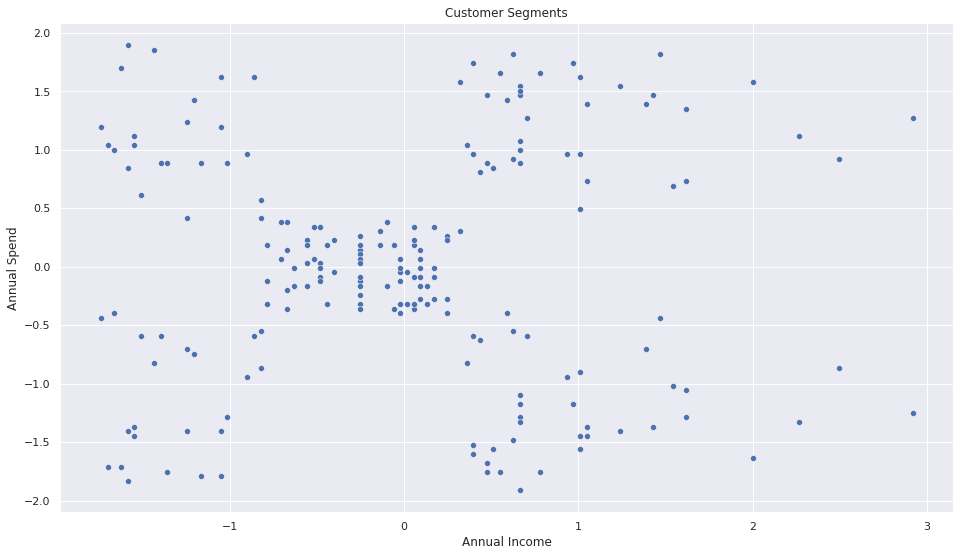

In [ ]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_custp)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

##**K-MEANS CLUSTERING**

###**Search for the Optimum Number of Clusters (k)**

K-means Clustering adalah marupakan salahs satu algoritma unsupervised machine learning.Tujuan dari algoritma ini adalah untuk menemukan grup dalam data, dengan jumlah grup yang diwakili oleh variabel K. Variabel K sendiri adalah jumlah cluster yang diinginkan.

Untuk memproses data ke dalam algoritma K-means Clustering , yaitu dimulai dengan kelompok pertama centroid yang dipilih secara acak, yang digunakan sebagai titik awal untuk setiap cluster, dan kemudian melakukan perhitungan berulang (berulang) untuk mengoptimalkan posisi centroid. Proses ini berhenti atau telah selesai dalam mengoptimalkan cluster ketika: Centroid telah stabil — tidak ada perubahan dalam nilai-nilai mereka karena pengelompokan telah berhasil dan jumlah iterasi yang ditentukan telah tercapai.

Lalu berapakah cluster / K yang akan dibuat untuk model ini dari? Untuk mengetahui berapa jumlah cluster / K terbaik untuk dataset ini bisa dilakukan dengan menggunakan Elbow Method, tetapi agar lebih akurat juga dapat diketahui menggunakan Silhoutte Method.

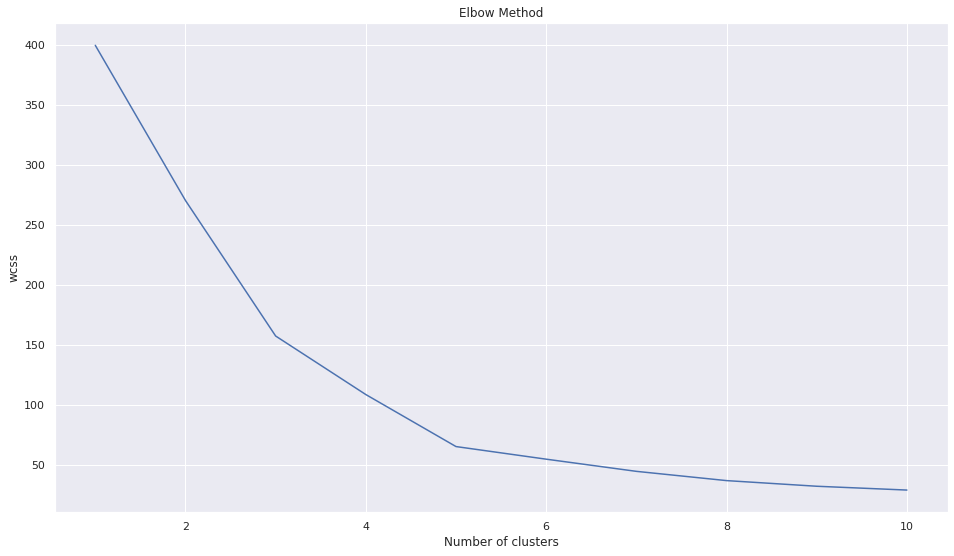

In [ ]:
# Transform Data Frame to Numpy Array
cust = df_custp.to_numpy()
cust

# Elbow Method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cust)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# Silhoutte Method
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(cust)
    label = kmeans.labels_
    sil_coeff = silhouette_score(cust, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.2932903073400333
For n_clusters=3, The Silhouette Coefficient is 0.46658474419000145
For n_clusters=4, The Silhouette Coefficient is 0.49390692375131984
For n_clusters=5, The Silhouette Coefficient is 0.5546571631111091
For n_clusters=6, The Silhouette Coefficient is 0.5398800926790662
For n_clusters=7, The Silhouette Coefficient is 0.5256026931619203
For n_clusters=8, The Silhouette Coefficient is 0.4542175096183406
For n_clusters=9, The Silhouette Coefficient is 0.45762010605218345
For n_clusters=10, The Silhouette Coefficient is 0.45271039849336775


Hasil penentuan jumlah cluster / K terbaik menggunakan Elbow Method dan Silhoutte Method adalah 5 (karena nilainya paling besar). Maka, model ini akan melakukan clustering dataset Mall Customer Segmentation menggunakan K-means dengan jumlah 5 cluster data.

###**Modeling K-Means**

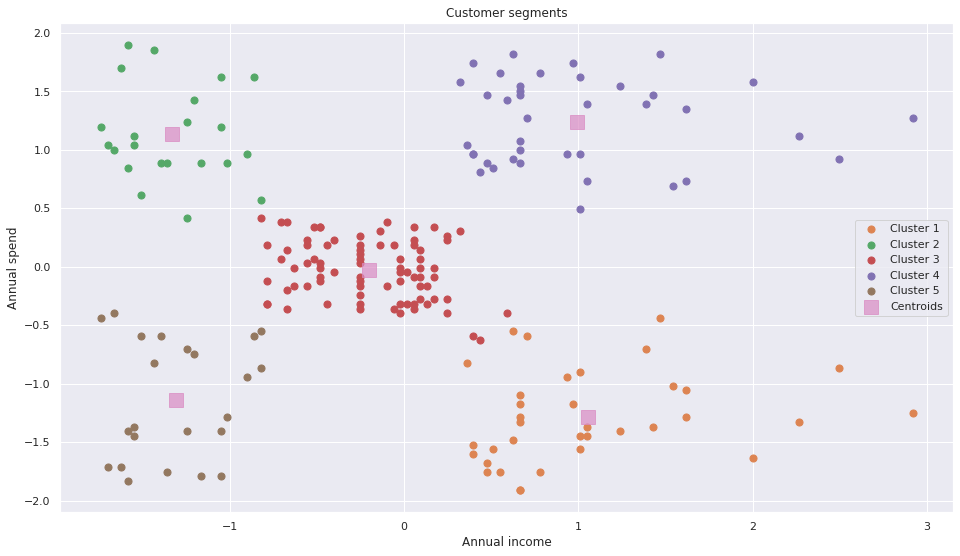

In [ ]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(cust)

# Visualising Clusters for k=3
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_custp)
plt.scatter(cust[cluster == 0, 0], cust[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(cust[cluster == 1, 0], cust[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(cust[cluster == 2, 0], cust[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(cust[cluster == 3, 0], cust[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(cust[cluster == 4, 0], cust[cluster == 4, 1], s = 50, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

Sudah berhasil dilakukan clustering dengan 5 centroid / kelompok. Dapat dianalisa bahwa :


*   Cluster 1 adalah customer dengan income tinggi-spending rendah
*   Cluster 2 adalah customer dengan income rendah-spending tinggi
*   Cluster 3 adalah customer dengan income sedang-spending sedang
*   Cluster 4 adalah customer dengan income tinggi-spending tinggi
*   Cluster 5 adalah customer dengan income rendah-spending rendah







Dengan melihat data hasil clustering ini, dapat disimpulkan manakah customer dengan gaya hidup yang boros, hemat atau pengeluaran mengikuti pemasukannya. Agar lebih mudah dalam mencari mana saja customer dengan kelompok tertentu, dapat dipermudah dengan cara mencari ID/Gender/Age nya.

In [ ]:
# Add Cluster Information to the Raw Data
df_cust['cluster'] = cluster
df_cust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


In [ ]:
# Save= Result
df_cust.to_csv('mall_cust_clusters.csv', index=False)

##**HIERARCHICAL CLUSTERING**

Hierarchical Clustering merupakan teknik clustering yang membentuk hirarki atau berdasarkan tingkatan tertentu sehingga menyerupai struktur pohon. Maka proses pengelompokannya dilakukan secara bertingkat atau bertahap. Biasanya, metode ini digunakan pada data yang jumlahnya tidak terlalu banyak dan jumlah cluster yang akan dibentuk belum diketahui.

Di dalam metode hirarki, terdapat dua jenis strategi pengelompokan yaitu :


*   Agglomerative (metode penggabungan) adalah strategi pengelompokan hirarki yang dimulai dengan setiap objek dalam satu cluster yang terpisah kemudian membentuk cluster yang semakin membesar. Jadi, banyaknya cluster awal adalah sama dengan banyaknya objek.
*   Divisive (metode pembagian) adalah strategi pengelompokan hirarki yang dimulai dari semua objek dikelompokkan menjadi cluster tunggal kemudian dipisah sampai setiap objek berada dalam cluster yang terpisah.



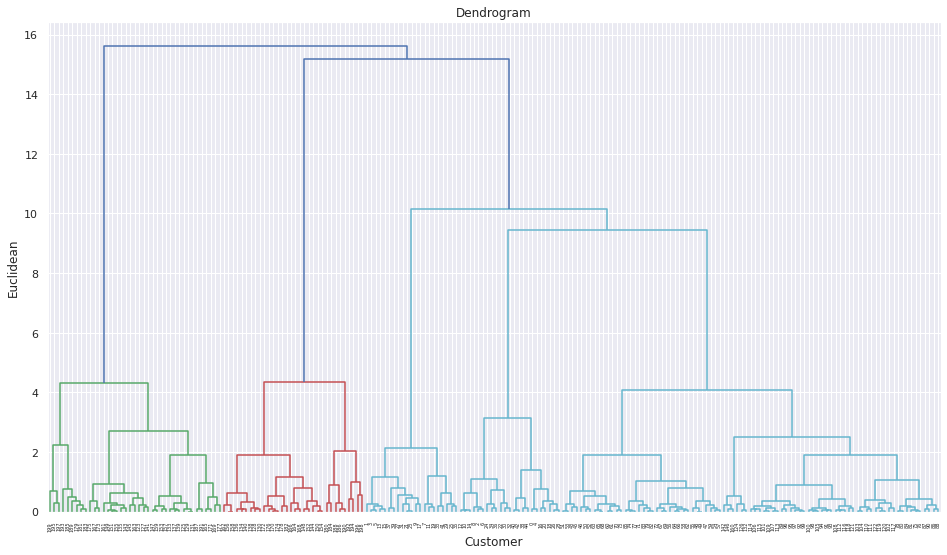

In [ ]:
# Modeling and Visualizing Clusters by Dendogram
dend = sch.dendrogram(sch.linkage(cust, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

Dendogram diatas adalah hasil dari metode agglomerative dengan teknik complete linkage.

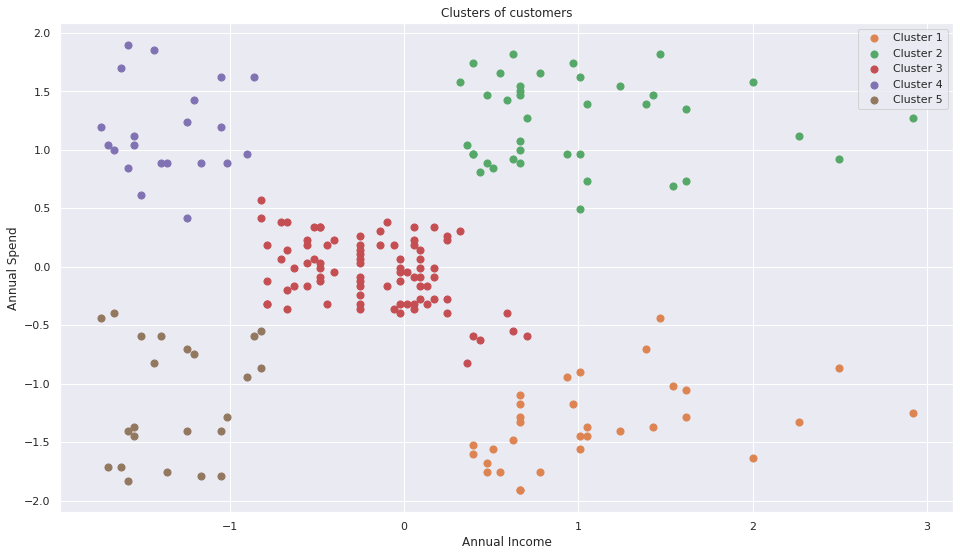

In [ ]:
# Apply the Hierarchical Clustering Model to the Dataset
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(cust)

# Visualising Clusters for k=3
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_custp)
plt.scatter(cust[hcluster == 0, 0], cust[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(cust[hcluster == 1, 0], cust[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(cust[hcluster == 2, 0], cust[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(cust[hcluster == 3, 0], cust[hcluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(cust[hcluster == 4, 0], cust[hcluster == 4, 1], s = 50, label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()

Algoritma ini juga mengcluster data menjadi 5 cluster, jika dibandingkan, hasilnya cukup sedikit berbeda terutama terlihat jelas pada cluster ke 3 jika menggunakan K-means data tersebut ada yang masuk ke dalam cluster 1.